<div class="alert alert-block alert-success">
<b><h1>Homework 1 Python:</h1><h2>Анализ данных</h2></b>
</div>

---
<h4>Первым делом загрузим все необходимые библиотеки и таблицы для последующего анализа</h4>

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
import seaborn as sns
from clickhouse_driver import Client
from pandas_profiling import ProfileReport
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
from plotly.subplots import make_subplots
import plotly.express as px
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import h3
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
client = Client('89.208.84.253',
                port= '59000',
                user='student',
                password='nUrHdn2N',
                secure=False,
                verify=True,
                database='data_analysis',
                compression=False)

In [3]:
result,columns = client.execute("""select *
from data_analysis.views
""",with_column_types=True)

views = pd.DataFrame(result, columns=[tuple[0] for tuple in columns])

In [4]:
result,columns = client.execute("""select *
from data_analysis.orders
""",with_column_types=True)

orders = pd.DataFrame(result, columns=[tuple[0] for tuple in columns])

In [5]:
views.head(10)

,idhash_view,view_dttm,tariff,idhash_order,idhash_client,client_bill_usd,latitude,longitude,del_latitude,del_longitude
0,3105945005,2015-12-06 00:00:02,Эконом,0,35537762,6.04,57.630691,39.888197,57.713856,39.772606
1,2062958078,2015-12-06 00:00:04,Комфорт,0,2920203325,0.00,57.622005,39.878959,0.000000,0.000000
2,2786426058,2015-12-06 00:00:05,Эконом,0,801152436,4.03,55.728050,37.580513,55.669315,37.561047
3,992462937,2015-12-06 00:00:06,Эконом,3777115420,260623123,1.54,57.653202,39.960438,57.647839,39.946285
4,517307460,2015-12-06 00:00:08,Комфорт+,0,2446042259,0.00,57.621269,39.867851,0.000000,0.000000
5,3373887573,2015-12-06 00:00:08,Эконом,0,2920203325,0.00,57.622169,39.880784,0.000000,0.000000
6,288065114,2015-12-06 00:00:11,Комфорт,0,2920203325,0.00,57.622172,39.880767,0.000000,0.000000
7,2631475578,2015-12-06 00:00:12,Эконом,0,1654398046,6.84,57.625915,39.835649,57.698303,39.790703
8,4157722167,2015-12-06 00:00:12,Эконом,0,2446042259,1.46,57.621269,39.867851,57.625736,39.878811
9,3403690412,2015-12-06 00:00:13,Эконом,0,2920203325,0.00,57.621885,39.879573,0.000000,0.000000


In [6]:
orders.head(40)

,idhash_order,idhash_view,order_dttm,da_dttm,rfc_dttm,cc_dttm,finish_dttm,cancel_dttm,status
0,3777115420,95199865,2015-12-06 00:00:09,2015-12-06 00:00:09,2015-12-06 00:03:31,2015-12-06 00:04:59,2015-12-06 00:10:06,NaT,CP
1,2983673012,3853062057,2015-12-06 00:00:11,2015-12-06 00:00:12,NaT,NaT,NaT,2015-12-06 00:01:26,CC
2,2177076394,147233410,2015-12-06 00:00:26,2015-12-06 00:00:37,2015-12-06 00:04:31,2015-12-06 00:07:06,2015-12-06 00:12:29,NaT,CP
3,1997846256,518227239,2015-12-06 00:00:32,2015-12-06 00:00:41,2015-12-06 00:04:04,2015-12-06 00:06:08,2015-12-06 00:17:11,NaT,CP
4,1893504594,3623774808,2015-12-06 00:01:07,2015-12-06 00:04:46,2015-12-06 00:11:35,2015-12-06 00:13:01,2015-12-06 00:29:43,NaT,CP
5,3136231244,1129037615,2015-12-06 00:01:08,2015-12-06 00:01:20,NaT,NaT,NaT,2015-12-06 00:02:32,CC
6,2781691252,2348665285,2015-12-06 00:02:01,NaT,NaT,NaT,NaT,2015-12-06 00:04:57,CC
7,1626214299,2013690030,2015-12-06 00:02:02,2015-12-06 00:03:30,NaT,NaT,NaT,2015-12-06 00:05:08,CC
8,75680415,1144749526,2015-12-06 00:02:06,NaT,NaT,NaT,NaT,2015-12-06 00:02:32,CC
9,1786344293,545184141,2015-12-06 00:02:09,2015-12-06 00:02:10,2015-12-06 00:07:56,2015-12-06 00:08:06,2015-12-06 00:18:00,NaT,CP


<div class="alert alert-block alert-info">
<b><h1>Задание № 1:</h1><h2>Разбиение наших клиентов на сегменты по RFM</h2></b>
</div>

## Разобьем клиентов на сегменты по RFM

* Recency — давность покупки — промежуток времени с момента последней покупки. Клиенты, которые покупали недавно, с большей вероятностью купят снова. 

* Frequency — частота покупок — количество покупок за данный период. Вероятность продажи по клиентам будет больше, если человек совершал много покупок.

* Monetary — сумма покупок — сумма всех покупок за данный период. Клиенты, потратившие на покупки большую сумму денег, вероятнее всего потратят снова.

In [7]:
good_orders = orders.query('status == "CP"')
good_orders.head()

,idhash_order,idhash_view,order_dttm,da_dttm,rfc_dttm,cc_dttm,finish_dttm,cancel_dttm,status
0,3777115420,95199865,2015-12-06 00:00:09,2015-12-06 00:00:09,2015-12-06 00:03:31,2015-12-06 00:04:59,2015-12-06 00:10:06,NaT,CP
2,2177076394,147233410,2015-12-06 00:00:26,2015-12-06 00:00:37,2015-12-06 00:04:31,2015-12-06 00:07:06,2015-12-06 00:12:29,NaT,CP
3,1997846256,518227239,2015-12-06 00:00:32,2015-12-06 00:00:41,2015-12-06 00:04:04,2015-12-06 00:06:08,2015-12-06 00:17:11,NaT,CP
4,1893504594,3623774808,2015-12-06 00:01:07,2015-12-06 00:04:46,2015-12-06 00:11:35,2015-12-06 00:13:01,2015-12-06 00:29:43,NaT,CP
9,1786344293,545184141,2015-12-06 00:02:09,2015-12-06 00:02:10,2015-12-06 00:07:56,2015-12-06 00:08:06,2015-12-06 00:18:00,NaT,CP


In [8]:
data = pd.merge(views,good_orders,how = 'inner',on = 'idhash_order')
data.head()

,idhash_view_x,view_dttm,tariff,idhash_order,idhash_client,client_bill_usd,latitude,longitude,del_latitude,del_longitude,idhash_view_y,order_dttm,da_dttm,rfc_dttm,cc_dttm,finish_dttm,cancel_dttm,status
0,992462937,2015-12-06 00:00:06,Эконом,3777115420,260623123,1.54,57.653202,39.960438,57.647839,39.946285,95199865,2015-12-06 00:00:09,2015-12-06 00:00:09,2015-12-06 00:03:31,2015-12-06 00:04:59,2015-12-06 00:10:06,NaT,CP
1,1947282491,2015-12-06 00:00:25,Эконом,2177076394,1419240472,1.88,57.686478,39.755018,57.693816,39.781856,147233410,2015-12-06 00:00:26,2015-12-06 00:00:37,2015-12-06 00:04:31,2015-12-06 00:07:06,2015-12-06 00:12:29,NaT,CP
2,77877294,2015-12-06 00:00:26,Эконом,1997846256,3243817824,5.12,57.632639,39.885291,57.703140,39.767166,518227239,2015-12-06 00:00:32,2015-12-06 00:00:41,2015-12-06 00:04:04,2015-12-06 00:06:08,2015-12-06 00:17:11,NaT,CP
3,2914068953,2015-12-06 00:00:48,Комфорт+,1893504594,2978411479,7.06,57.625793,39.873318,57.615158,39.791698,3623774808,2015-12-06 00:01:07,2015-12-06 00:04:46,2015-12-06 00:11:35,2015-12-06 00:13:01,2015-12-06 00:29:43,NaT,CP
4,160802346,2015-12-06 00:02:02,Эконом,1786344293,1583692502,2.78,57.620392,39.811165,57.623192,39.864094,545184141,2015-12-06 00:02:09,2015-12-06 00:02:10,2015-12-06 00:07:56,2015-12-06 00:08:06,2015-12-06 00:18:00,NaT,CP


In [9]:
good_data = data[['idhash_client','idhash_order','client_bill_usd','order_dttm']]
good_data.head(10)

,idhash_client,idhash_order,client_bill_usd,order_dttm
0,260623123,3777115420,1.54,2015-12-06 00:00:09
1,1419240472,2177076394,1.88,2015-12-06 00:00:26
2,3243817824,1997846256,5.12,2015-12-06 00:00:32
3,2978411479,1893504594,7.06,2015-12-06 00:01:07
4,1583692502,1786344293,2.78,2015-12-06 00:02:09
5,696838431,1362679218,2.04,2015-12-06 00:02:18
6,2417070532,2628667711,3.00,2015-12-06 00:02:17
7,2688030696,2382942072,5.78,2015-12-06 00:04:07
8,2539139899,3219002705,5.49,2015-12-06 00:04:37
9,2706549258,599679549,2.15,2015-12-06 00:04:47


#### Я отобрал необходимые для RFM анализа данные с двух таблиц order и view и оставил только завершенные поездки.

In [10]:
print('Количество анализируемых заказов:',len(good_data))
print('Количество уникальных клиентов:',good_data['idhash_client'].nunique())

Количество анализируемых заказов: 49919
Количество уникальных клиентов: 18091


In [61]:
analyse_data = good_data.groupby('idhash_client').agg({'client_bill_usd':'sum',
                                                       'idhash_order':'count',
                                                       'order_dttm':'max'}).reset_index()
analyse_data.head()

,idhash_client,client_bill_usd,idhash_order,order_dttm
0,39262,6.37,3,2015-12-19 22:42:41
1,48902,2.65,1,2015-12-14 12:32:11
2,199395,15.35,3,2015-12-17 10:12:34
3,1721255,4.88,2,2015-12-17 23:41:47
4,2825748,2.62,1,2015-12-09 06:06:59


In [12]:
print('Время самого первого заказа:',good_data['order_dttm'].max())
print('Время самого последнего заказа:',good_data['order_dttm'].min())

Время самого первого заказа: 2015-12-19 23:59:21
Время самого последнего заказа: 2015-12-06 00:00:09


___
*Так как у нас имеются данные всего лишь за две недели, то я решил оценивать Recency в часах*

*Также Monetary я переведу в рубли, т.к. мы все-таки в РФ*
___

In [13]:
analyse_data['recency_hours'] = round((analyse_data['order_dttm'].max() - 
                                          analyse_data['order_dttm']) / np.timedelta64(1, 'h'))
analyse_data['frequency_times'] = analyse_data['idhash_order']
analyse_data['monetary_rubles'] = analyse_data['client_bill_usd'] * 77
analyse_data.head(10)

,idhash_client,client_bill_usd,idhash_order,order_dttm,recency_hours,frequency_times,monetary_rubles
0,39262,6.370,3,2015-12-19 22:42:41,1.0,3,490.490
1,48902,2.650,1,2015-12-14 12:32:11,131.0,1,204.050
2,199395,15.350,3,2015-12-17 10:12:34,62.0,3,1181.950
3,1721255,4.880,2,2015-12-17 23:41:47,48.0,2,375.760
4,2825748,2.620,1,2015-12-09 06:06:59,258.0,1,201.740
5,3322714,0.000,1,2015-12-16 17:08:35,79.0,1,0.000
6,4098821,10.545,2,2015-12-10 09:39:52,230.0,2,811.965
7,4145403,3.370,1,2015-12-16 21:43:57,74.0,1,259.490
8,4401443,10.845,2,2015-12-16 07:34:14,88.0,2,835.065
9,4632884,17.160,5,2015-12-17 14:57:31,57.0,5,1321.320


___
*Разбивать на группы каждый из показателей я решил по квантилям.*
___

In [14]:
analyse_data['monetary_rubles'].quantile([.33,.66])

0.33    368.83
0.66    841.61
Name: monetary_rubles, dtype: float64

In [15]:
analyse_data['r_score'] = 0
analyse_data.head()
analyse_data['f_score'] = 0
analyse_data.head()
analyse_data['m_score'] = 0
analyse_data.head()

,idhash_client,client_bill_usd,idhash_order,order_dttm,recency_hours,frequency_times,monetary_rubles,r_score,f_score,m_score
0,39262,6.37,3,2015-12-19 22:42:41,1.0,3,490.49,0,0,0
1,48902,2.65,1,2015-12-14 12:32:11,131.0,1,204.05,0,0,0
2,199395,15.35,3,2015-12-17 10:12:34,62.0,3,1181.95,0,0,0
3,1721255,4.88,2,2015-12-17 23:41:47,48.0,2,375.76,0,0,0
4,2825748,2.62,1,2015-12-09 06:06:59,258.0,1,201.74,0,0,0


In [16]:
def separate_with_quant(data, param, new_column):
    for i in range(len(data)):
        if data.loc[i,param] <= data[param].quantile(.33):
            data.loc[i,new_column] = 1
        elif data.loc[i,param] <= data[param].quantile(.66):
            data.loc[i,new_column] = 2
        else:
            data.loc[i,new_column] = 3
    

In [17]:
def separate_with_quant_2(data, param, new_column):
    for i in range(len(data)):
        if data.loc[i,param] <= data[param].quantile(.33):
            data.loc[i,new_column] = 3
        elif data.loc[i,param] <= data[param].quantile(.66):
            data.loc[i,new_column] = 2
        else:
            data.loc[i,new_column] = 1

In [18]:
print('Персентили для Monetary:')
print(analyse_data['monetary_rubles'].quantile([.33,.66]))
print('Персентили для Frequency:')
print(analyse_data['frequency_times'].quantile([.33,.66]))
print('Персентили для Recency:')
print(analyse_data['recency_hours'].quantile([.33,.66]))

Персентили для Monetary:
0.33    368.83
0.66    841.61
Name: monetary_rubles, dtype: float64
Персентили для Frequency:
0.33    1.0
0.66    2.0
Name: frequency_times, dtype: float64
Персентили для Recency:
0.33     76.0
0.66    190.0
Name: recency_hours, dtype: float64


___
*Затем я создал функцию, которая разбивает данные в три корзины, как было в одной из статей про RFM. Разбил. Потом вывел отдельный столбец с общим рейтингом для каждого клиента*
___

In [19]:
separate_with_quant_2(analyse_data,'recency_hours','r_score')
separate_with_quant(analyse_data,'frequency_times','f_score')
separate_with_quant(analyse_data,'monetary_rubles','m_score')

analyse_data.head(10)

,idhash_client,client_bill_usd,idhash_order,order_dttm,recency_hours,frequency_times,monetary_rubles,r_score,f_score,m_score
0,39262,6.370,3,2015-12-19 22:42:41,1.0,3,490.490,3,3,2
1,48902,2.650,1,2015-12-14 12:32:11,131.0,1,204.050,2,1,1
2,199395,15.350,3,2015-12-17 10:12:34,62.0,3,1181.950,3,3,3
3,1721255,4.880,2,2015-12-17 23:41:47,48.0,2,375.760,3,2,2
4,2825748,2.620,1,2015-12-09 06:06:59,258.0,1,201.740,1,1,1
5,3322714,0.000,1,2015-12-16 17:08:35,79.0,1,0.000,2,1,1
6,4098821,10.545,2,2015-12-10 09:39:52,230.0,2,811.965,1,2,2
7,4145403,3.370,1,2015-12-16 21:43:57,74.0,1,259.490,3,1,1
8,4401443,10.845,2,2015-12-16 07:34:14,88.0,2,835.065,2,2,2
9,4632884,17.160,5,2015-12-17 14:57:31,57.0,5,1321.320,3,3,3


In [20]:
analyse_data['rfm_score'] = analyse_data['r_score'].astype(str) + analyse_data['f_score'].astype(str) + analyse_data['m_score'].astype(str)
analyse_data.head(10)

,idhash_client,client_bill_usd,idhash_order,order_dttm,recency_hours,frequency_times,monetary_rubles,r_score,f_score,m_score,rfm_score
0,39262,6.370,3,2015-12-19 22:42:41,1.0,3,490.490,3,3,2,332
1,48902,2.650,1,2015-12-14 12:32:11,131.0,1,204.050,2,1,1,211
2,199395,15.350,3,2015-12-17 10:12:34,62.0,3,1181.950,3,3,3,333
3,1721255,4.880,2,2015-12-17 23:41:47,48.0,2,375.760,3,2,2,322
4,2825748,2.620,1,2015-12-09 06:06:59,258.0,1,201.740,1,1,1,111
5,3322714,0.000,1,2015-12-16 17:08:35,79.0,1,0.000,2,1,1,211
6,4098821,10.545,2,2015-12-10 09:39:52,230.0,2,811.965,1,2,2,122
7,4145403,3.370,1,2015-12-16 21:43:57,74.0,1,259.490,3,1,1,311
8,4401443,10.845,2,2015-12-16 07:34:14,88.0,2,835.065,2,2,2,222
9,4632884,17.160,5,2015-12-17 14:57:31,57.0,5,1321.320,3,3,3,333


In [21]:
def appropriate_group(data):
    for i in range(len(data)): 
        if data.loc[i,'rfm_score'] in ('111','112','113'):
            data.loc[i,'rating'] = 'lost'
        elif data.loc[i,'rfm_score'] in ('121','122','123','131','132','133'):
            data.loc[i,'rating'] = 'loyal_inactive'
        elif data.loc[i,'rfm_score'] in ('211','212','213','221','222','223'):
            data.loc[i,'rating'] = 'sleep'
        elif data.loc[i,'rfm_score'] in ('231','232','233'):
            data.loc[i,'rating'] = 'loyal_sleep'
        elif data.loc[i,'rfm_score'] in ('311','312','313'):
            data.loc[i,'rating'] = 'new'
        elif data.loc[i,'rfm_score'] in ('321','322','323'):
            data.loc[i,'rating'] = 'developing'
        else:
            data.loc[i,'rating'] = 'vip'
        
            

___
*Затем я создал функцию, которая разбивает данные в три корзины, как было в одной из статей про RFM. Разбил. Потом вывел отдельный столбец с общим рейтингом для каждого клиента*
___

In [22]:
appropriate_group(analyse_data)

In [23]:
analyse_data.head(10)

,idhash_client,client_bill_usd,idhash_order,order_dttm,recency_hours,frequency_times,monetary_rubles,r_score,f_score,m_score,rfm_score,rating
0,39262,6.370,3,2015-12-19 22:42:41,1.0,3,490.490,3,3,2,332,vip
1,48902,2.650,1,2015-12-14 12:32:11,131.0,1,204.050,2,1,1,211,sleep
2,199395,15.350,3,2015-12-17 10:12:34,62.0,3,1181.950,3,3,3,333,vip
3,1721255,4.880,2,2015-12-17 23:41:47,48.0,2,375.760,3,2,2,322,developing
4,2825748,2.620,1,2015-12-09 06:06:59,258.0,1,201.740,1,1,1,111,lost
5,3322714,0.000,1,2015-12-16 17:08:35,79.0,1,0.000,2,1,1,211,sleep
6,4098821,10.545,2,2015-12-10 09:39:52,230.0,2,811.965,1,2,2,122,loyal_inactive
7,4145403,3.370,1,2015-12-16 21:43:57,74.0,1,259.490,3,1,1,311,new
8,4401443,10.845,2,2015-12-16 07:34:14,88.0,2,835.065,2,2,2,222,sleep
9,4632884,17.160,5,2015-12-17 14:57:31,57.0,5,1321.320,3,3,3,333,vip


Разбиение я взял как в одной из статей. 

- R1—F1—M(1-3) — потерянные (lost);
- R1—F(2-3)—M(1-3) — лояльные клиенты, потерявшие активность (loyal_inactive);
- R2-F(1-2)-M(1-3) — спящие (sleep);
- R2-F(3)-M(1-3) — лояльные спящие клиенты (loyal_sleep);
- R3—F1—M(1-3) — новички (new);
- R3—F2—M(1-3) — развивающиеся (developing);
- R3—F3—M3 — постоянные (vip).

<div class="alert alert-block alert-info">
<b><h1>Задание № 2:</h1><h2>Подсчет метрик</h2></b>
</div>

<h2><span style="color:red">Метрика - View2Order</span></h2>

In [24]:
first_table = analyse_data[['idhash_client','rating']]
first_table.head(10)

,idhash_client,rating
0,39262,vip
1,48902,sleep
2,199395,vip
3,1721255,developing
4,2825748,lost
5,3322714,sleep
6,4098821,loyal_inactive
7,4145403,new
8,4401443,sleep
9,4632884,vip


***
**Оставлю с прошлого задания только столбцы с клиентом и статусом**
***

In [25]:
first_metric_data = pd.merge(views,first_table,how = 'inner',on = 'idhash_client')
display(first_metric_data.head())

views_for_segment = first_metric_data.groupby('rating')['idhash_view'].count()

orders_for_segment = first_metric_data.query('idhash_order != 0').groupby('rating')['idhash_order'].count()

View2Order = orders_for_segment / views_for_segment
display(View2Order)

,idhash_view,view_dttm,tariff,idhash_order,idhash_client,client_bill_usd,latitude,longitude,del_latitude,del_longitude,rating
0,3105945005,2015-12-06 00:00:02,Эконом,0,35537762,6.04,57.630691,39.888197,57.713856,39.772606,vip
1,3274576095,2015-12-06 00:08:07,Комфорт+,0,35537762,20.14,57.630775,39.888255,57.713856,39.772606,vip
2,3180094025,2015-12-06 00:08:22,Эконом,0,35537762,10.07,57.630775,39.888255,57.713856,39.772606,vip
3,121849721,2015-12-06 13:29:05,Комфорт+,3423141028,35537762,4.24,57.698621,39.760012,57.713856,39.772606,vip
4,3069396800,2015-12-09 08:38:31,Эконом,700942460,35537762,2.04,57.713856,39.772606,57.697657,39.760354,vip


rating
developing        0.198168
lost              0.179752
loyal_inactive    0.194279
loyal_sleep       0.208510
new               0.192635
sleep             0.186359
vip               0.230908
dtype: float64

***
**Соединяю таблицы и нахожу метрику View2Order по сегментам**
***

In [26]:
first_metric_data = first_metric_data.drop(['tariff','latitude', 'longitude', 'del_latitude', 'del_longitude'],axis = 1)
first_metric_data['hour'] = first_metric_data['view_dttm'].dt.hour
first_metric_data['day'] = first_metric_data['view_dttm'].dt.day
first_metric_data['time_of_day'] = np.where(first_metric_data['hour'] < 3 ,'Ночь',
                                           np.where(first_metric_data['hour'] < 9 ,'Утро',
                                           np.where(first_metric_data['hour'] < 17 ,'День','Вечер')))

In [27]:
first_metric_data.head(10)

,idhash_view,view_dttm,idhash_order,idhash_client,client_bill_usd,rating,hour,day,time_of_day
0,3105945005,2015-12-06 00:00:02,0,35537762,6.040,vip,0,6,Ночь
1,3274576095,2015-12-06 00:08:07,0,35537762,20.140,vip,0,6,Ночь
2,3180094025,2015-12-06 00:08:22,0,35537762,10.070,vip,0,6,Ночь
3,121849721,2015-12-06 13:29:05,3423141028,35537762,4.240,vip,13,6,День
4,3069396800,2015-12-09 08:38:31,700942460,35537762,2.040,vip,8,9,Утро
5,1093930737,2015-12-09 08:44:36,4261799821,35537762,3.070,vip,8,9,Утро
6,137629272,2015-12-11 22:22:48,3146403209,35537762,2.090,vip,22,11,Вечер
7,3168018175,2015-12-12 21:12:16,0,35537762,3.135,vip,21,12,Вечер
8,4061626361,2015-12-12 21:12:23,0,35537762,2.390,vip,21,12,Вечер
9,57306825,2015-12-12 21:12:50,2021121334,35537762,2.390,vip,21,12,Вечер


***
**Тут я добавляю столбы hour day time_of_day для дальнейшей группировки и удаляю ненужные для анализа столбы (иначе таблица получается слишком большой)**
***

In [28]:
views_for_time = first_metric_data.groupby(['day','time_of_day'])['idhash_view'].count()

orders_for_time = first_metric_data.query('idhash_order != 0').groupby(['day','time_of_day'])['idhash_order'].count()

View2Ordertime = orders_for_time / views_for_time
display(View2Ordertime)

day  time_of_day
6    Вечер          0.189088
     День           0.199345
     Ночь           0.173228
     Утро           0.227292
7    Вечер          0.190679
     День           0.191166
     Ночь           0.158710
     Утро           0.245000
8    Вечер          0.165469
     День           0.202462
     Ночь           0.184624
     Утро           0.237605
9    Вечер          0.190338
     День           0.180323
     Ночь           0.180057
     Утро           0.195610
10   Вечер          0.205618
     День           0.190514
     Ночь           0.181799
     Утро           0.186323
11   Вечер          0.222425
     День           0.215085
     Ночь           0.197301
     Утро           0.217177
12   Вечер          0.207538
     День           0.212616
     Ночь           0.193171
     Утро           0.204812
13   Вечер          0.210214
     День           0.215264
     Ночь           0.188504
     Утро           0.211146
14   Вечер          0.210532
     День           0.2517

***
**Нахожу метрику View2Order по дням и времени суток**
***

<h2><span style="color:red">Метрика - Средний чек</span></h2>

***
**Сначала подготовим таблицу для будущего анализа**
***

In [29]:
cheque_data = pd.merge(views,first_table,how = 'inner',on = 'idhash_client')
cheque_data.head()

,idhash_view,view_dttm,tariff,idhash_order,idhash_client,client_bill_usd,latitude,longitude,del_latitude,del_longitude,rating
0,3105945005,2015-12-06 00:00:02,Эконом,0,35537762,6.04,57.630691,39.888197,57.713856,39.772606,vip
1,3274576095,2015-12-06 00:08:07,Комфорт+,0,35537762,20.14,57.630775,39.888255,57.713856,39.772606,vip
2,3180094025,2015-12-06 00:08:22,Эконом,0,35537762,10.07,57.630775,39.888255,57.713856,39.772606,vip
3,121849721,2015-12-06 13:29:05,Комфорт+,3423141028,35537762,4.24,57.698621,39.760012,57.713856,39.772606,vip
4,3069396800,2015-12-09 08:38:31,Эконом,700942460,35537762,2.04,57.713856,39.772606,57.697657,39.760354,vip


In [30]:
cheque_data = cheque_data.drop(['tariff','view_dttm','del_latitude','del_longitude'],axis = 1)

In [31]:
cheque_data.head(10)

,idhash_view,idhash_order,idhash_client,client_bill_usd,latitude,longitude,rating
0,3105945005,0,35537762,6.040,57.630691,39.888197,vip
1,3274576095,0,35537762,20.140,57.630775,39.888255,vip
2,3180094025,0,35537762,10.070,57.630775,39.888255,vip
3,121849721,3423141028,35537762,4.240,57.698621,39.760012,vip
4,3069396800,700942460,35537762,2.040,57.713856,39.772606,vip
5,1093930737,4261799821,35537762,3.070,57.713802,39.772614,vip
6,137629272,3146403209,35537762,2.090,57.699245,39.766992,vip
7,3168018175,0,35537762,3.135,57.698872,39.763584,vip
8,4061626361,0,35537762,2.390,57.697657,39.760354,vip
9,57306825,2021121334,35537762,2.390,57.697657,39.760354,vip


In [32]:
mean_cheque = round(cheque_data.groupby('rating')['client_bill_usd'].mean() * 77, 1)
mean_cheque

rating
developing        361.0
lost              426.0
loyal_inactive    374.1
loyal_sleep       343.4
new               399.7
sleep             396.4
vip               319.7
Name: client_bill_usd, dtype: float64

***
**Теперь я сделаю кластеризацию (возьму код с лекции, простите :) )**
***

In [33]:
coord=views.loc[:,['idhash_view','latitude','longitude']]

kmeans = KMeans(n_clusters = 4, init ='k-means++',max_iter=300,n_init=10,algorithm = 'elkan')
kmeans.fit(coord[coord.columns[1:3]]) 
coord['cluster_label'] = kmeans.fit_predict(coord[coord.columns[1:3]])
labels = kmeans.predict(coord[coord.columns[1:3]]) 
centroids  = kmeans.cluster_centers_
centroid_labels = [centroids[i] for i in labels]
coord['center'] = centroid_labels

coord.groupby('cluster_label')['idhash_view'].count()

d = {'cluster_label':[0,1,2,3],'center':[centroids[i] for i in set(labels)]}

center_info = pd.DataFrame(d)




In [34]:
center_info['center'][1] = [55.753960, 37.620393]

<ipython-input-34-e663fd0f81bf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
geolocator = Nominatim(user_agent="Maxim1999)")


In [36]:
def get_city(locations):
    cities = []
    for location in locations:
        cities.append(geolocator.reverse(location).raw['address'].get('state'))
    return cities

In [37]:
center_info['city'] = get_city(center_info['center'])
center_info

,cluster_label,center,city
0,0,"[55.729143084617725, 37.576307223943026]",Москва
1,1,"[55.75396, 37.620393]",Москва
2,2,"[57.61478278763335, 39.87665418211185]",Ярославская область
3,3,"[53.67596890740741, 100.02398257407407]",Иркутская область


In [38]:
center_info = center_info[['cluster_label','city']]

coord = coord[['idhash_view','cluster_label']]

geo =  center_info.join(coord.set_index('cluster_label'), on='cluster_label',how = 'inner')

cheque_data_city = pd.merge(geo,cheque_data,how = 'inner',on = 'idhash_view')


In [39]:
cheque_data_city.head(10)

,cluster_label,city,idhash_view,idhash_order,idhash_client,client_bill_usd,latitude,longitude,rating
0,0,Москва,1119617500,0,1740902884,0.0,55.733191,37.552017,lost
1,0,Москва,4024861464,0,1740902884,0.0,55.733191,37.552017,lost
2,0,Москва,129326817,0,1740902884,0.0,55.733199,37.552002,lost
3,0,Москва,230989360,0,1740902884,0.0,55.733199,37.552002,lost
4,0,Москва,725595067,0,1740902884,0.0,55.733198,37.552006,lost
5,0,Москва,771711366,0,1740902884,0.0,55.733199,37.552002,lost
6,0,Москва,1076487963,0,1740902884,0.0,55.733317,37.552005,lost
7,0,Москва,2203352547,0,1740902884,0.0,55.733317,37.552005,lost
8,0,Москва,3908990297,0,1740902884,0.0,55.733198,37.552006,lost
9,0,Москва,3910156844,0,1740902884,0.0,55.733199,37.552002,lost


***
**Я получил необходимую таблицу еще и со столбцом city**
***

In [40]:
mean_cheque_city = round(cheque_data_city.groupby('city')['client_bill_usd'].mean() * 77, 1)
mean_cheque_city

city
Москва                 170.9
Ярославская область    357.5
Name: client_bill_usd, dtype: float64

***
**Иркутс пропал, тк мы делали кластаризазую для таблицы view, а join у таблиц с заказами именно. Т.е. по моей терии у нас в Иркутске были только просмотры такси. Ну либо я ошибся где-то :)**
***

<h2><span style="color:red">Метрика - Order2Ride</span></h2>

***
**Сначала подготовим таблицу для будущего анализа**
***

In [41]:
data = pd.merge(views,first_table,how = 'inner',on = 'idhash_client')
data.head()

,idhash_view,view_dttm,tariff,idhash_order,idhash_client,client_bill_usd,latitude,longitude,del_latitude,del_longitude,rating
0,3105945005,2015-12-06 00:00:02,Эконом,0,35537762,6.04,57.630691,39.888197,57.713856,39.772606,vip
1,3274576095,2015-12-06 00:08:07,Комфорт+,0,35537762,20.14,57.630775,39.888255,57.713856,39.772606,vip
2,3180094025,2015-12-06 00:08:22,Эконом,0,35537762,10.07,57.630775,39.888255,57.713856,39.772606,vip
3,121849721,2015-12-06 13:29:05,Комфорт+,3423141028,35537762,4.24,57.698621,39.760012,57.713856,39.772606,vip
4,3069396800,2015-12-09 08:38:31,Эконом,700942460,35537762,2.04,57.713856,39.772606,57.697657,39.760354,vip


In [42]:
Order2Ride_metric_data = pd.merge(orders,data[['idhash_order','idhash_client','rating']],how = 'inner',on = 'idhash_order')

In [43]:
Order2Ride_metric_data.head()

,idhash_order,idhash_view,order_dttm,da_dttm,rfc_dttm,cc_dttm,finish_dttm,cancel_dttm,status,idhash_client,rating
0,3777115420,95199865,2015-12-06 00:00:09,2015-12-06 00:00:09,2015-12-06 00:03:31,2015-12-06 00:04:59,2015-12-06 00:10:06,NaT,CP,260623123,vip
1,2177076394,147233410,2015-12-06 00:00:26,2015-12-06 00:00:37,2015-12-06 00:04:31,2015-12-06 00:07:06,2015-12-06 00:12:29,NaT,CP,1419240472,vip
2,1997846256,518227239,2015-12-06 00:00:32,2015-12-06 00:00:41,2015-12-06 00:04:04,2015-12-06 00:06:08,2015-12-06 00:17:11,NaT,CP,3243817824,vip
3,1893504594,3623774808,2015-12-06 00:01:07,2015-12-06 00:04:46,2015-12-06 00:11:35,2015-12-06 00:13:01,2015-12-06 00:29:43,NaT,CP,2978411479,loyal_sleep
4,3136231244,1129037615,2015-12-06 00:01:08,2015-12-06 00:01:20,NaT,NaT,NaT,2015-12-06 00:02:32,CC,2920203325,loyal_inactive


In [44]:
orders_metric = Order2Ride_metric_data.groupby('rating')['status'].count()

rides_metric = Order2Ride_metric_data.query('status == "CP"').groupby('rating')['status'].count()

Order2Ride = rides_metric / orders_metric
Order2Ride

rating
developing        0.696341
lost              0.614460
loyal_inactive    0.681864
loyal_sleep       0.705588
new               0.662708
sleep             0.654184
vip               0.742841
Name: status, dtype: float64

<h2><span style="color:red">Метрика - IQR</span></h2>

***
**Данные по сути те же, что и при подсчете среднего чека, только теперь нужно найти межквартильный диапазон. Поэтому возьму данные оттуда**
***

In [45]:
cheque_data.head()

,idhash_view,idhash_order,idhash_client,client_bill_usd,latitude,longitude,rating
0,3105945005,0,35537762,6.04,57.630691,39.888197,vip
1,3274576095,0,35537762,20.14,57.630775,39.888255,vip
2,3180094025,0,35537762,10.07,57.630775,39.888255,vip
3,121849721,3423141028,35537762,4.24,57.698621,39.760012,vip
4,3069396800,700942460,35537762,2.04,57.713856,39.772606,vip


In [46]:
IQR_cheque_25 = cheque_data.groupby('rating')['client_bill_usd'].quantile(.25) * 77.1
IQR_cheque_75 = cheque_data.groupby('rating')['client_bill_usd'].quantile(.75) * 77.1

IQR_cheque = IQR_cheque_75 - IQR_cheque_25

IQR_cheque

rating
developing        318.4230
lost              363.1410
loyal_inactive    322.6635
loyal_sleep       306.8580
new               339.2400
sleep             318.4230
vip               267.1515
Name: client_bill_usd, dtype: float64

## Это я нашел IQR по сегментам

In [47]:
cheque_data_city.head(10)

,cluster_label,city,idhash_view,idhash_order,idhash_client,client_bill_usd,latitude,longitude,rating
0,0,Москва,1119617500,0,1740902884,0.0,55.733191,37.552017,lost
1,0,Москва,4024861464,0,1740902884,0.0,55.733191,37.552017,lost
2,0,Москва,129326817,0,1740902884,0.0,55.733199,37.552002,lost
3,0,Москва,230989360,0,1740902884,0.0,55.733199,37.552002,lost
4,0,Москва,725595067,0,1740902884,0.0,55.733198,37.552006,lost
5,0,Москва,771711366,0,1740902884,0.0,55.733199,37.552002,lost
6,0,Москва,1076487963,0,1740902884,0.0,55.733317,37.552005,lost
7,0,Москва,2203352547,0,1740902884,0.0,55.733317,37.552005,lost
8,0,Москва,3908990297,0,1740902884,0.0,55.733198,37.552006,lost
9,0,Москва,3910156844,0,1740902884,0.0,55.733199,37.552002,lost


In [48]:
IQR_cheque_25 = cheque_data_city.groupby('city')['client_bill_usd'].quantile(.25) * 77.1
IQR_cheque_75 = cheque_data_city.groupby('city')['client_bill_usd'].quantile(.75) * 77.1

IQR_cheque = IQR_cheque_75 - IQR_cheque_25

IQR_cheque

city
Москва                   0.000
Ярославская область    304.545
Name: client_bill_usd, dtype: float64

In [49]:
cheque_data_city.groupby('city')['city'].count()

city
Москва                    694
Ярославская область    346176
Name: city, dtype: int64

In [50]:
geo.groupby('city')['city'].count()

city
Иркутская область          54
Москва                 483903
Ярославская область    419584
Name: city, dtype: int64

## Что произошло и почему у Мск 0 ? 

### Мое мнение: в теблице geo мы анализировали просмотры, поэтому у Мск и Яр их очень много, порядка 400-500к. Когда мы потом создаем таблицу по заказам, у меня получается, что почти все заказы сделаны в Яр и всего 700 в Мск. Получается слишком мало данных для анализа. Наверное, я где-то неправильно логику выстроил. Если вы объясните - буду рад.

<AxesSubplot:>

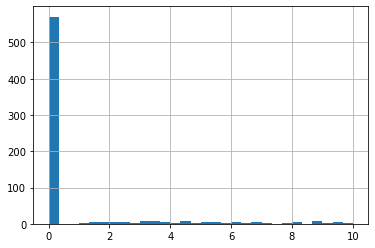

In [51]:
cheque_data_city.query('city == "Москва"')['client_bill_usd'].hist(bins=30,range=(0,10))

## Ну вот 0 потому что почти все цены - 0. Сейчас попробую исключить 0 и посмотреть какой тогда IQR получится 

In [52]:
test = cheque_data_city.query('client_bill_usd != 0')

IQR_cheque_25 = test.groupby('city')['client_bill_usd'].quantile(.25) * 77.1
IQR_cheque_75 = test.groupby('city')['client_bill_usd'].quantile(.75) * 77.1

IQR_cheque = IQR_cheque_75 - IQR_cheque_25

IQR_cheque

city
Москва                 431.18175
Ярославская область    279.10200
Name: client_bill_usd, dtype: float64

***
**Намного лучше, но не знаю, правильно ли я мыслю. Буду рад критике**
***

<div class="alert alert-block alert-info">
<b><h1>Обшие метрики:</h1></b>
</div>



<h2><span style="color:red">Метрика - средняяя длительность поездок по часам</span></h2>

In [53]:
time_data = orders[['idhash_order','order_dttm','finish_dttm','status']].query('status == "CP"')
time_data.head()

,idhash_order,order_dttm,finish_dttm,status
0,3777115420,2015-12-06 00:00:09,2015-12-06 00:10:06,CP
2,2177076394,2015-12-06 00:00:26,2015-12-06 00:12:29,CP
3,1997846256,2015-12-06 00:00:32,2015-12-06 00:17:11,CP
4,1893504594,2015-12-06 00:01:07,2015-12-06 00:29:43,CP
9,1786344293,2015-12-06 00:02:09,2015-12-06 00:18:00,CP


In [54]:
time_data['duration_min'] = (time_data['finish_dttm'] - time_data['order_dttm']).dt.total_seconds().div(60).astype(int)
time_data['hour'] = time_data['order_dttm'].dt.round("H").dt.hour
time_data.head(10)

,idhash_order,order_dttm,finish_dttm,status,duration_min,hour
0,3777115420,2015-12-06 00:00:09,2015-12-06 00:10:06,CP,9,0
2,2177076394,2015-12-06 00:00:26,2015-12-06 00:12:29,CP,12,0
3,1997846256,2015-12-06 00:00:32,2015-12-06 00:17:11,CP,16,0
4,1893504594,2015-12-06 00:01:07,2015-12-06 00:29:43,CP,28,0
9,1786344293,2015-12-06 00:02:09,2015-12-06 00:18:00,CP,15,0
10,2628667711,2015-12-06 00:02:17,2015-12-06 00:12:05,CP,9,0
11,1362679218,2015-12-06 00:02:18,2015-12-06 00:16:06,CP,13,0
14,2382942072,2015-12-06 00:04:07,2015-12-06 00:24:40,CP,20,0
15,3219002705,2015-12-06 00:04:37,2015-12-06 00:22:40,CP,18,0
16,599679549,2015-12-06 00:04:47,2015-12-06 00:16:34,CP,11,0


In [55]:
time_data.groupby('hour')['duration_min'].mean()

hour
0     19.459634
1     18.570252
2     18.182125
3     18.450649
4     17.230461
5     18.871560
6     19.172589
7     21.284848
8     20.490820
9     18.852625
10    20.182609
11    19.823431
12    21.315195
13    20.353234
14    20.319816
15    20.179381
16    22.597268
17    22.553945
18    21.482603
19    20.346604
20    21.433192
21    21.824923
22    24.327114
23    21.528938
Name: duration_min, dtype: float64

## Получается, почти всегда среднее время поездки около 20 минут.

<h2><span style="color:red">Метрика - динамика ценообразования</span></h2>

In [56]:
help_data = views[['idhash_order','client_bill_usd']]
help_data.head()

,idhash_order,client_bill_usd
0,0,6.04
1,0,0.00
2,0,4.03
3,3777115420,1.54
4,0,0.00


In [57]:
bill_per_min = pd.merge(help_data,time_data,how = 'inner',on = 'idhash_order')

bill_per_min['client_bill_rub'] = bill_per_min['client_bill_usd'] * 77.1

bill_per_min['day_of_the_week'] = bill_per_min['order_dttm'].dt.day_name()

bill_per_min['time_of_day'] = np.where(bill_per_min['hour'] < 3 ,'Ночь',
                                           np.where(bill_per_min['hour'] < 9 ,'Утро',
                                           np.where(bill_per_min['hour'] < 17 ,'День','Вечер')))

bill_per_min['bill_per_min'] = round(bill_per_min['client_bill_rub'] / bill_per_min['duration_min'], 1)

bill_per_min.head()

,idhash_order,client_bill_usd,order_dttm,finish_dttm,status,duration_min,hour,client_bill_rub,day_of_the_week,time_of_day,bill_per_min
0,3777115420,1.54,2015-12-06 00:00:09,2015-12-06 00:10:06,CP,9,0,118.734,Sunday,Ночь,13.2
1,2177076394,1.88,2015-12-06 00:00:26,2015-12-06 00:12:29,CP,12,0,144.948,Sunday,Ночь,12.1
2,1997846256,5.12,2015-12-06 00:00:32,2015-12-06 00:17:11,CP,16,0,394.752,Sunday,Ночь,24.7
3,1893504594,7.06,2015-12-06 00:01:07,2015-12-06 00:29:43,CP,28,0,544.326,Sunday,Ночь,19.4
4,1786344293,2.78,2015-12-06 00:02:09,2015-12-06 00:18:00,CP,15,0,214.338,Sunday,Ночь,14.3


In [58]:
bill_per_min.groupby(['day_of_the_week','time_of_day'])['bill_per_min'].mean()

day_of_the_week  time_of_day
Friday           Вечер          18.772943
                 День           18.973183
                 Ночь           24.630324
                 Утро           24.419891
Monday           Вечер          17.836016
                 День                 inf
                 Ночь           19.660798
                 Утро           16.038305
Saturday         Вечер                inf
                 День           17.666989
                 Ночь           28.647377
                 Утро           25.625901
Sunday           Вечер                inf
                 День                 inf
                 Ночь           19.708764
                 Утро           17.561094
Thursday         Вечер          19.275793
                 День           17.349226
                 Ночь           24.077695
                 Утро           19.263737
Tuesday          Вечер                inf
                 День           15.706711
                 Ночь           21.035417
     